In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_UsaCounty')\
        .getOrCreate()

22/08/30 10:24:19 WARN Utils: Your hostname, MacBook-Air-de-Willians.local resolves to a loopback address: 127.0.0.1; using 192.168.18.9 instead (on interface en0)
22/08/30 10:24:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/30 10:24:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/30 10:24:22 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/30 10:24:22 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [4]:
dataUsa = spark.read.csv(
    'archive/usa_county_wise.csv',
    sep = ',',
    header = True,
    )

dataUsa.printSchema()

root
 |-- UID: string (nullable = true)
 |-- iso2: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- code3: string (nullable = true)
 |-- FIPS: string (nullable = true)
 |-- Admin2: string (nullable = true)
 |-- Province_State: string (nullable = true)
 |-- Country_Region: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long_: string (nullable = true)
 |-- Combined_Key: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Confirmed: string (nullable = true)
 |-- Deaths: string (nullable = true)



In [5]:
dataUsa.show(8)

+--------+----+----+-----+-------+------------+--------------------+--------------+-------------------+------------------+--------------------+-------+---------+------+
|     UID|iso2|iso3|code3|   FIPS|      Admin2|      Province_State|Country_Region|                Lat|             Long_|        Combined_Key|   Date|Confirmed|Deaths|
+--------+----+----+-----+-------+------------+--------------------+--------------+-------------------+------------------+--------------------+-------+---------+------+
|      16|  AS| ASM|   16|   60.0|        null|      American Samoa|            US|-14.270999999999999|          -170.132|  American Samoa, US|1/22/20|        0|     0|
|     316|  GU| GUM|  316|   66.0|        null|                Guam|            US|            13.4443|          144.7937|            Guam, US|1/22/20|        0|     0|
|     580|  MP| MNP|  580|   69.0|        null|Northern Mariana ...|            US|            15.0979|          145.6739|Northern Mariana ...|1/22/20|    

In [6]:
from pyspark.sql.types import *

data_schema = [
               StructField('UID', IntegerType(), True),
               StructField('iso2', StringType(), True),
               StructField('iso3', StringType(), True),
               StructField('code3', IntegerType(), True),
               StructField('FIPS', DoubleType(), True),
               StructField('Admin2', StringType(), True),
               StructField('Province_State', StringType(), True),
               StructField('Country_Region', StringType(), True),
               StructField('Lat', DoubleType(), True),
               StructField('Long_', DoubleType(), True),
               StructField('Combined_Key', StringType(), True),
               StructField('Date', DateType(), True),
               StructField('Confirmed', IntegerType(), True),
               StructField('Deaths', IntegerType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [7]:
dataUsa = spark.read.csv(
    'archive/usa_county_wise.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [8]:
dataUsa.printSchema()

root
 |-- UID: integer (nullable = true)
 |-- iso2: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- code3: integer (nullable = true)
 |-- FIPS: double (nullable = true)
 |-- Admin2: string (nullable = true)
 |-- Province_State: string (nullable = true)
 |-- Country_Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long_: double (nullable = true)
 |-- Combined_Key: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)



In [9]:
dataUsa.show(6)

+--------+----+----+-----+-------+---------+--------------------+--------------+-------------------+------------------+--------------------+----+---------+------+
|     UID|iso2|iso3|code3|   FIPS|   Admin2|      Province_State|Country_Region|                Lat|             Long_|        Combined_Key|Date|Confirmed|Deaths|
+--------+----+----+-----+-------+---------+--------------------+--------------+-------------------+------------------+--------------------+----+---------+------+
|      16|  AS| ASM|   16|   60.0|     null|      American Samoa|            US|-14.270999999999999|          -170.132|  American Samoa, US|null|        0|     0|
|     316|  GU| GUM|  316|   66.0|     null|                Guam|            US|            13.4443|          144.7937|            Guam, US|null|        0|     0|
|     580|  MP| MNP|  580|   69.0|     null|Northern Mariana ...|            US|            15.0979|          145.6739|Northern Mariana ...|null|        0|     0|
|63072001|  PR| PRI|  

### Generando file parquet

In [10]:
dataUsa.write.parquet('data/parquets/usacounty')

In [11]:
dataUsa.describe().toPandas()

,summary,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Confirmed,Deaths
0,count,627920,627920,627920,627920,626040,626792,627920,627920,627920,627920,627920,627920,627920
1,mean,8.342957994550899E7,None,None,834.491616766467,33061.68468468468,None,None,None,36.70721244570872,-88.60147445561189,None,357.28428462224485,17.53632787616257
2,stddev,4314702.339347854,None,None,36.492620240099704,18636.156825347312,None,None,None,9.06157189067228,21.715747344705864,None,3487.282693522076,300.9914658104832
3,min,16,AS,ASM,16,60.0,Abbeville,Alabama,US,-14.270999999999999,-174.1596,"Abbeville, South Carolina, US",0,0
4,max,84099999,VI,VIR,850,99999.0,Ziebach,Wyoming,US,69.31479216,145.6739,"Ziebach, South Dakota, US",224051,23500


### Agrupando datos por Country_Region

In [12]:
dataUsa.select(['Province_State', 'Confirmed', 'Deaths']).groupBy('Province_State').mean().show()

+--------------------+------------------+--------------------+
|      Province_State|    avg(Confirmed)|         avg(Deaths)|
+--------------------+------------------+--------------------+
|                Utah|229.55276020701552|  2.0455721679125936|
|              Hawaii| 70.61550151975683|  1.5220364741641337|
|           Minnesota|157.62777910590486|   6.446330384891226|
|                Ohio|252.69875886524824|   13.17677304964539|
|Northern Mariana ...|14.579787234042554|  1.2234042553191489|
|            Arkansas| 97.80339872893065|  1.3243299253937553|
|              Oregon|  97.2855543113102|  2.5426931690929453|
|               Texas| 263.8531831781915|   4.374729886968085|
|        North Dakota|28.131044487427467|  1.2323984526112186|
|        Pennsylvania| 624.1900246685168|   41.41697502312673|
|         Connecticut| 2254.904255319149|  199.12021276595743|
|            Nebraska| 80.94025755879059|  1.0100223964165733|
|             Vermont|40.211436170212764|  1.9321808510

In [13]:
sec_df = dataUsa.select(['Province_State', 'Confirmed', 'Deaths']).groupBy('Province_State').mean().toPandas()

In [14]:
sec_df

,Province_State,avg(Confirmed),avg(Deaths)
0,Utah,229.552760,2.045572
1,Hawaii,70.615502,1.522036
2,Minnesota,157.627779,6.446330
3,Ohio,252.698759,13.176773
4,Northern Mariana Islands,14.579787,1.223404
5,Arkansas,97.803399,1.324330
6,Oregon,97.285554,2.542693
7,Texas,263.853183,4.374730
8,North Dakota,28.131044,1.232398
9,Pennsylvania,624.190025,41.416975


<AxesSubplot:xlabel='Province_State'>

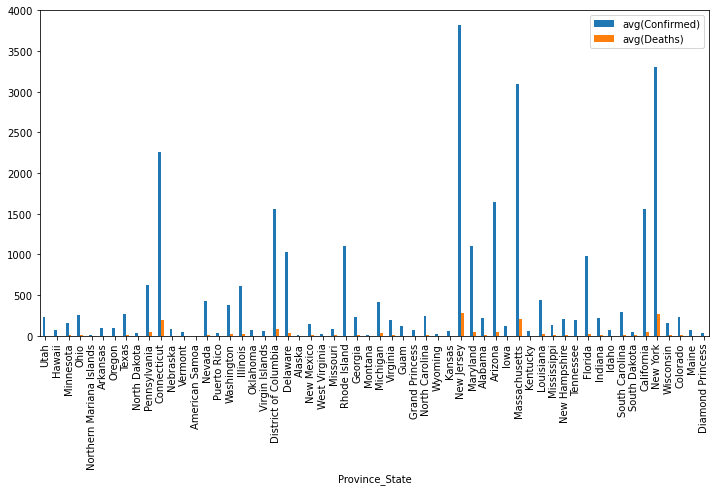

In [15]:
sec_df.plot(kind = 'bar', x='Province_State', y = sec_df.columns.tolist()[1:], figsize=(12, 6))